# Analyse de la structure de bande du CdCl2

In [61]:
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np

## Téléchargement de la structure de bande électronique

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

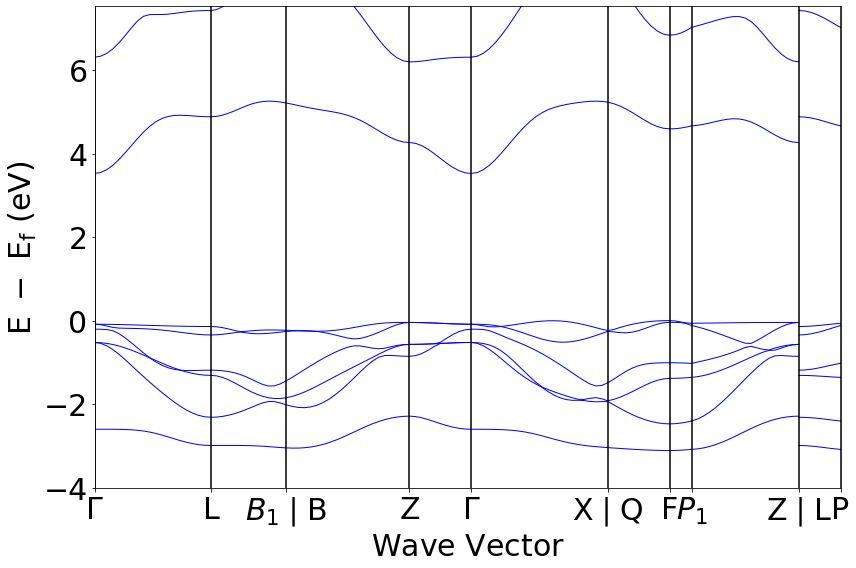

In [62]:
with MPRester("sdp42oAyhJ8t1iJnx") as m:
    band_structure = m.get_bandstructure_by_material_id("mp-22881")

plot = BSPlotter(band_structure)
plot.get_plot()

## Bande interdite

In [64]:
gap = band_structure.get_band_gap()
e_band = gap.get('energy')
print('Energie de la bande :', e_band, 'eV.')
if gap.get('direct') == False:
    print('La bande interdite est indirect.')
else:
    print('La bande interdite est direct.')

print('La bande interdite se situe entre', 0, 'eV et', e_band, 'eV.')
print("Vecteur de transition :", gap['transition'])

Energie de la bande : 3.5214 eV.
La bande interdite est indirect.
La bande interdite se situe entre 0 eV et 3.5214 eV.
Vecteur de transition : F-\Gamma


Etant donné que l'énergie de la bande interdite se trouve entre 2 eV et 6 eV, on peut en conclure que le CdCl2 est un isolant électrique.

## Dispersion maximale et minimale

### Analyse de la dernière bande de valence

In [65]:
# Determine le E0
data = plotter.BSPlotter(band_structure).bs_plot_data()
E_0 = data.get('zero_energy')

# Determine vbm
vbm = band_structure.get_vbm()
E_vbm = vbm['energy']
kpoint_vbm = vbm['kpoint'].cart_coords

print('Energie du maximum de la bande de valence = ',E_vbm,'eV')
print('sur le graphe : E-Ef = ', (E_vbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =', kpoint_vbm)
print(vbm.get('band_index'))

Energie du maximum de la bande de valence =  -1.2888 eV
sur le graphe : E-Ef =  0.0
Vecteur k (coordonnées cartésiennes) = [ 0.48961264  0.         -0.85092489]
defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})


La dernière bande de valence est la bande 12.

### Analyse de la première bande de conduction

In [66]:
cbm = band_structure.get_cbm()
E_cbm = cbm['energy']
kpoint_cbm = cbm['kpoint'].cart_coords

print('Energie du minimum de la bande de conduction = ',E_cbm,'eV')
print('sur le graphe : E-Ef = ', (E_cbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =',kpoint_cbm)
print(cbm.get('band_index'))

Energie du minimum de la bande de conduction =  2.2326 eV
sur le graphe : E-Ef =  3.5214
Vecteur k (coordonnées cartésiennes) = [0. 0. 0.]
defaultdict(<class 'list'>, {<Spin.up: 1>: [13]})


Le première bande de valence est la bande 13.

In [68]:
%%html
<img src = "band.jpg",width=50,height=50>

## Calcul de la masse effective 

La formule pour déterminer la masse effective est $m^* = \frac{\hbar^2 k^2}{2 * E(k)}$

E(k) est l'énergie d'un électron de vecteur d'onde k dans la bande considérée.

$\hbar = \frac{h}{2 \pi}$, h est la constante de Boltzmann et vaut 1,38064852 .10$^{-23}$ J/K = 4,1357 .10$^{-15}$ eV s

In [69]:
h_bar = 6.5821e-16
m_electron = 9.11e-31
m_vbm = (h_bar**2 * (kpoint_vbm[0]**2+kpoint_vbm[1]**2+kpoint_vbm[2]**2))/(2*abs(E_vbm))
m_cbm = (h_bar**2 * (kpoint_cbm[0]**2+kpoint_cbm[1]**2+kpoint_cbm[2]**2))/(2*E_cbm)
print('La masse effective au sommet de la dernière bande de valence =', m_vbm, 'kg', '=',  m_vbm/m_electron, 'm_e')
print('La masse effective à la base de la première bande de conduction =', m_cbm, 'kg')

La masse effective au sommet de la dernière bande de valence = 1.6199347112198502e-31 kg = 0.1778193974994347 m_e
La masse effective à la base de la première bande de conduction = 0.0 kg


On remarque que la masse effective au sommet de la dernière bande de valence est proche de celle de l'électron : m$_{vbm}$ = 0.1778193974994347 m$_{electron}$

On remarque également que la masse effective à la base de la première bande de conduction est nulle étant donné que son vecteur d'onde k est nul.